1. Most popular dog name
2. Most dog tweet got favorited and retweeted
3. Most source of the tweets
4. Most and least rated breed
5. Distribution of rating by stage 
6. Relationship between 
7. Relationship between popular of user vs. popular of tweets

#  Twitter: WeRateDogs

## Intro
WeRateDogs is a Twitter account that posts and rates pictures of dogs. These ratings often are not serious and have numerators that are greater than the denominators. 

In the analysis, I will aim to (1) wrangle the data + (2) answer the following questions:

- What is WeRateDogs's posting trend by month?
- What is the monthly trend of interactions with WeRateDogs's posts?
- What are the most popular dog breeds based on number of posts, interactions by Twitter users, and ratings?
- Is there any correlation between WeRateDogs's ratings and the interactions by Twitter users?

In [1]:
!pip install tweepy
import pandas as pd 
import numpy as np
import tweepy as tp 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline
import os 
import json 
import requests  
pd.set_option('display.max_colwidth', None)

## 1. Gather data

In [2]:
#1.  Archive file
archive = pd.read_csv('/Users/lap13729/Documents/Data Analytics/Portfolio/Python/Projects/Twitter WeRateDogs Data Set/datasets/twitter-archive-enhanced.csv')

#2. Image prediction file (URL)
    # Predictions of dog breeds
url_image_predictions = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')

    # Create dataframe from TSV
predictions = pd.read_csv(url_image_predictions, delimiter='\t')

#3. Tweets
tweet = pd.read_json('/Users/lap13729/Documents/Data Analytics/Portfolio/Python/Projects/Twitter WeRateDogs Data Set/datasets/tweet-json.txt',  lines = True)

##  2. Assess data
Visual assessment

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [4]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http:/

In [6]:
archive.info()
archive.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
archive.loc[343]

tweet_id                                                                                                                                                                                                                                                                   832040443403784192
in_reply_to_status_id                                                                                                                                                                                                                                                                     NaN
in_reply_to_user_id                                                                                                                                                                                                                                                                       NaN
timestamp                                                                                                                                     

In [8]:
archive[archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [9]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [10]:
predictions.info()
predictions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
predictions.p1.value_counts()
predictions.p2.value_counts()
predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [12]:
tweet.info()
tweet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


# Overall assessment
`archive`: 
- Multiple separated columns for each dog stage (columns doggo, floofer, pupper, puppo) -> there should only be one column to specify what stage a given dog is in. 
- Some of the names in the name column appear to be incorrect -- it is unlikely that a dog would be named "a", for example.

`predictions`: 
- Multiple separated columns of prediction 1, prediction 2, and prediction 3. -> one column to specify the prediction number, and then additional columns for the actual prediction, confidence, and whether the prediction is type of dog breed. The prediction number column should have the int data type. 
- p1, p2, and p3 are inconsistent in their capitalization.

`tweet_data`: 
- Some tweets that have been deleted and therefore do not have retweet or favorite counts. However, I cannot do anything to retrieve this missing data.


### **`archived`**

In [13]:
# Check if there are any duplicated rows or tweet_id.
sum(archive.duplicated())
sum(archive.duplicated('tweet_id'))

0

In [14]:
# Use info to check if any potential issues
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From the above info, some variables' data types should be changed
- `timestamp` -> datetime data type
- `stage` (doggo, floofer, etc.) -> categorical data type.

Also, archive has **retweets**, which should not be included because I only care about original content from WeRateDogs. I will check to see if the values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are all in the same rows. (from the info only 181 non-null obs)

`retweeted_x`

In [15]:
# Check number of rows where 3 retweet columns are filled
# if filled columns of retweet_status_id, retweet_status_user_id and retweet_status_timestamp are in the same rows, the result number should be 181
len(archive[
    archive['retweeted_status_id'].notnull()
    &
    archive['retweeted_status_user_id'].notnull()
    &
    archive['retweeted_status_timestamp'].notnull()
])


181

`expanded_urls`

In [16]:
archive['expanded_urls'].sample(5)

2309                                                                    https://twitter.com/dog_rates/status/666804364988780544/photo/1
1186    https://twitter.com/dog_rates/status/718540630683709445/photo/1,https://twitter.com/dog_rates/status/718540630683709445/photo/1
1069                                                                    https://twitter.com/dog_rates/status/740365076218183684/photo/1
700                                                                     https://twitter.com/dog_rates/status/786233965241827333/photo/1
310                                                                         https://vine.co/v/5W2Dg3XPX7a,https://vine.co/v/5W2Dg3XPX7a
Name: expanded_urls, dtype: object

It looks like these are just links to associated content, such as photos, videos, or content. It makes sense that there are some missing values right now, since not all tweets will have links. However, my final dataset should not have missing values in `expanded_urls`, as I am only concerned about tweets with images.

I will also take a look at the descriptive statistics for the `archive` dataframe.

In [17]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


`rating_numerator` and `rating_denominator`

I only care about the descriptive statistics of `rating_numerator` and `rating_denominator`. The min is 0 and max is even >1000 (too low and too high respectively)

In [18]:
#Check the origin of rating_numerator and denominator (in `text`)
archive.loc[0, 'text']

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [19]:
# Check if the ratings in `text` and in `rating_numerator`/`rating_denominator` is alike
    # Use regex to extract integers in `text`
archive.text.str.extract('(\d+)/(\d+)').astype('int').describe()

,0,1
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


-> Alike. Need to deep dive to find different issues.

(0.0, 20.0)

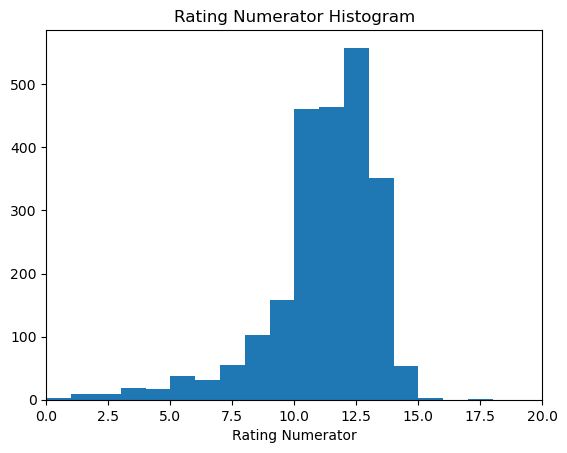

In [20]:
# Histogram to see range of ratings columns
bins = np.arange(0,archive['rating_numerator'].max()+1,1)
plt.hist(data = archive, x = 'rating_numerator', bins = bins)
plt.title('Rating Numerator Histogram')
plt.xlabel('Rating Numerator')
plt.xlim(0,20) # can customize diff views, best at (0,20)

-> Normally fall into range (5,15). 
-> Deep dive range out of (5,15) to see if there are any mistakes

In [21]:
 with pd.option_context('display.max_rows', None):   
    print(archive[(archive['rating_numerator'] >=15)
    |
    (archive['rating_numerator'] <=5)]['text'])

45                                       This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
55                                                                                    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
188                                                                                        @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189                                         @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
285                                                                               RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI
290                                                                                                           

-> Some are incorrect due to wrong fraction was extracted
eg: line 2335: 1/2 legged

-> There are decimal numerators (eg: line 45) so that these columns should be float type

`name`

In [22]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

- Many "None" -> should change to null
- Many not start with capital letter -> potential to be not a real name

In [23]:
# checks if there is a non-uppercase letter character at the beginning of a string and then allows for zero or more characters of any kind (.*) after that.
archive[archive['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [24]:
#Check if there is any incorrect name 
archive[~archive['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()

None          745
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

-> Looks good. Now look at non-name cases to see if there are any commonalities between them

In [25]:
with pd.option_context('display.max_rows',None):
    print(archive[archive['name'].str.contains(r'^[^A-Z].*$')]['text'])

22                                    I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56             Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118                           RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169                   We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193     Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
335                                                               There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  

**`predictions`**

In [26]:
# Check if there's any duplicated rows
sum(predictions.duplicated())

#Check if there's any duplicated tweet_id
sum(predictions.duplicated('tweet_id'))

# Check if there's any duplicated jpg_url
sum(predictions.duplicated('jpg_url'))

66

In [27]:
# Look up obs with tweet_id have duplicated url
duplicated_jpg_url = predictions[predictions.duplicated('jpg_url')]

archive[archive['tweet_id'].isin(duplicated_jpg_url['tweet_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,"https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1",14,10,Walter,None,None,None,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",13,10,None,None,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1",13,10,Astrid,doggo,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,759566828574212096,NaN,NaN,2016-07-31 01:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P,7.395441e+17,4.196984e+09,2016-06-05 19:47:03 +0000,"https://twitter.com/dog_rates/status/739544079319588864/photo/1,https://twitter.com/dog_rates/status/739544079319588864/photo/1",10,10,None,None,None,None,None
895,759159934323924993,NaN,NaN,2016-07-29 22:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO7HEQGA,6.703191e+17,4.196984e+0

In [28]:
# According to the retweeted_x columns, value = NaN means not retweet.
# Check if duplicated jpg_url are related to retweets
# Therefore, the duplicated `jpg_url` should not be in the `predictions` dataframe.


In [29]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


No missing values

Now look at descriptive stats for `predictions`

In [30]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
#nothing really need to change

**`tweet`**

In [33]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [34]:
tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


**Assessment Summary**
1. Tidiness issues

`archive`
- Need to tidy the stages (doggo, floofer, pupper, puppo)

`predictions`
- Need to tidy prediction 1,2,3

2. Quality issues

`archive`
- Stage column (after tidying doggo, etc. should have categorical type)
- Timestamp should be datetime data type
- Not just include original content but also retweets and posts without linked content
- Some ratings are incorrectly extracted and should be decimal using float type
- Many dog names are None or lowercase words
- Stage names (doggo, etc.) are also not extracted correctly 

`predictions`
- After tidying, prediction number needs to have int type
- Value in p1, p2, p3 are inconsistent in the first letter capitalization
- Not all have dog-related prediction
- Duplicated jpg_url which are related to retweets
- Rows with confidence greater than 1

`tweet`
- Some tweets in `archive` have missing data of retweet_count or favourite_count (cannot be retrieved elsewhere)
- Rows with 0 favourite_counts -> related to retweets

# Clean

In [35]:
# Make copies of data to clean
archive_clean= archive.copy()
predictions_clean = predictions.copy()
tweet_clean = tweet.copy()

1. Narrow down `archive` and `predictions` to only original content (no retweets)

In [36]:
# `archive`
# No retweets = NaN in `retweeted_x`
# Only keep obs without values in `retweeted_status_id`
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

#Drop columns related to `retweeted_x`
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [37]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

In [38]:
# `predictions`
# Map tweet_id of cleaned `archive` to `predictions` to keep only non-retweets. This should also remove the duplivated values in the jpg_url column
predictions_clean = predictions_clean[predictions_clean['tweet_id'].isin(archive_clean['tweet_id'])]

In [39]:
#test
predictions_clean.info()
#Check if there is any duplicated jpg_url
sum(predictions_clean.duplicated())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1994 non-null   int64  
 1   jpg_url   1994 non-null   object 
 2   img_num   1994 non-null   int64  
 3   p1        1994 non-null   object 
 4   p1_conf   1994 non-null   float64
 5   p1_dog    1994 non-null   bool   
 6   p2        1994 non-null   object 
 7   p2_conf   1994 non-null   float64
 8   p2_dog    1994 non-null   bool   
 9   p3        1994 non-null   object 
 10  p3_conf   1994 non-null   float64
 11  p3_dog    1994 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 161.6+ KB


0

2. Remove all records in `predictions` that are presumably not dog pictures

In [40]:
# Only keep obs with at least 1 True value among 3p
predictions_clean = predictions_clean.query('p1_dog == True | p2_dog == True | p3_dog == True')

In [41]:
#Test
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1686 non-null   int64  
 1   jpg_url   1686 non-null   object 
 2   img_num   1686 non-null   int64  
 3   p1        1686 non-null   object 
 4   p1_conf   1686 non-null   float64
 5   p1_dog    1686 non-null   bool   
 6   p2        1686 non-null   object 
 7   p2_conf   1686 non-null   float64
 8   p2_dog    1686 non-null   bool   
 9   p3        1686 non-null   object 
 10  p3_conf   1686 non-null   float64
 11  p3_dog    1686 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 136.7+ KB


3. In `archive_clean`, only keep obs that have tweet_id also in prediction_clean to remove records that are not image of dogs

In [42]:
archive_clean = archive_clean[archive_clean['tweet_id'].isin(predictions_clean['tweet_id'])]

In [43]:
#Test: Check that `archive` and `predictions` now have the same number of tweets
assert len(archive_clean) == len(predictions_clean)

4. Remove unneccessary data from `tweet`, then merge to archive

In [44]:
tweet_clean = tweet_clean[['id', 'retweet_count', 'favorite_count']]

In [45]:
archive_clean = archive_clean.merge(tweet_clean, how = 'left', left_on = 'tweet_id', right_on = 'id')
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,id,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,892177421306343426,6514,33819
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,891815181378084864,4328,25461
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,891689557279858688,8964,42908
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,891327558926688256,9774,41048
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,891087950875897856,3261,20562


In [46]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1686 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1686 non-null   object 
 4   source                 1686 non-null   object 
 5   text                   1686 non-null   object 
 6   expanded_urls          1686 non-null   object 
 7   rating_numerator       1686 non-null   int64  
 8   rating_denominator     1686 non-null   int64  
 9   name                   1686 non-null   object 
 10  doggo                  1686 non-null   object 
 11  floofer                1686 non-null   object 
 12  pupper                 1686 non-null   object 
 13  puppo                  1686 non-null   object 
 14  id                     1686 non-null   int64  
 15  retw

5. Tidying p1,2,3 in prediction from 9 columns to 4 columns: px, px name, px_conf, px_dog

In [47]:
predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [48]:
def melt_predictions(p1, p2, p3, value_name):
    '''
    INPUT:
    p1 (str) - column related to the first prediction
    p2 (str) - column related to the second prediction
    p3 (str) - column related to the third prediction
    value_name (str) - name of the column that holds the values from the predictions
    
    OUTPUT:
    df (DataFrame) - dataframe with unpivoted prediction data
    
    Unpivot dataframe for prediction columns.
    '''
    
    df = predictions_clean[['tweet_id', 'jpg_url', 'img_num', p1, p2, p3]]
    # change column names so that they do not have to be extracted later
    df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)
    df = pd.melt(
        df,
        id_vars=['tweet_id', 'jpg_url', 'img_num'],
        value_vars=[1, 2, 3],
        var_name='prediction_num',
        value_name=value_name
    )
    return df

In [49]:
predictions_names = melt_predictions('p1', 'p2', 'p3', 'prediction')
predictions_conf = melt_predictions('p1_conf', 'p2_conf', 'p3_conf', 'confidence')
predictions_dog = melt_predictions('p1_dog', 'p2_dog', 'p3_dog', 'dog_status')

/var/folders/8d/r0gz9f1j0091d9vzhw0mq64h0000gn/T/ipykernel_3163/2031704300.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)
/var/folders/8d/r0gz9f1j0091d9vzhw0mq64h0000gn/T/ipykernel_3163/2031704300.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)
/var/folders/8d/r0gz9f1j0091d9vzhw0mq64h0000gn/T/ipykernel_3163/2031704300.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [50]:
# merge together the three melted dataframes
predictions_clean = predictions_names.merge(
    predictions_conf,
    how='inner',
    on=['tweet_id', 'jpg_url', 'img_num', 'prediction_num']
).merge(
    predictions_dog,
    how='inner',
    on=['tweet_id', 'jpg_url', 'img_num', 'prediction_num']
)

In [51]:
predictions_clean.head(2)

,tweet_id,jpg_url,img_num,prediction_num,prediction,confidence,dog_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True


In [52]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5058 entries, 0 to 5057
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        5058 non-null   int64  
 1   jpg_url         5058 non-null   object 
 2   img_num         5058 non-null   int64  
 3   prediction_num  5058 non-null   object 
 4   prediction      5058 non-null   object 
 5   confidence      5058 non-null   float64
 6   dog_status      5058 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 281.5+ KB


In [53]:
predictions_names.head(1)

,tweet_id,jpg_url,img_num,prediction_num,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel


6. Wrangle dog names in `archive`

In [54]:
# Search missing dog names found from `text` (names come after 'named')
archive_clean['named'] = archive_clean['text'].str.extract('named ([A-Z][a-z]*(\s[A-Z][a-z]*)*)')[0]

In [55]:
archive_clean[archive_clean['named'] == 'Wylie']
# the `name` is missing so we can replace dog names from `named` to `name`

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,id,retweet_count,favorite_count,named
1313,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None,675706639471788032,106,693,Wylie


In [56]:
# Replace cells with names that come after 'named'
archive_clean.loc[archive_clean['named'].notnull(),'name'] = archive_clean[archive_clean['named'].notnull()]['named']

In [57]:
#drop `named`
archive_clean.drop('named', axis = 1, inplace= True)

In [58]:
# Replace all remaining lowercase names with NaN
archive_clean.loc[archive_clean['name'].str.contains(r'^[^A-Z].*$'), 'name'] = np.nan

#Replace all 'None' with NaN
archive_clean['name'] = archive_clean['name'].replace('None',np.nan)

In [59]:
archive_clean['name'].unique() #test

array(['Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola', 'Kevin',
       'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley',
       'Alfy', 'Koko', 'Rey', 'Gary', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Hobbes', 'Burt',
       'Lorenzo', 'Carl', 'Milky', 'Trooper', 'Sophie', 'Wyatt', 'Rosie',
     

7. Since we cannot trust available rating_numerator and rating_denominator, we will extract rating from `text` and include possible decimals

In [60]:
# allow digits with decimals in regex
rating_regex = '(\d+\.?\d*)/(\d+\.?\d*)'
archive_clean[['rating_numerator','rating_denominator']] = archive_clean['text'].str.extract(rating_regex)
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

In [61]:
#test
archive_clean.info() 
archive_clean.query('rating_denominator != 10.')['text']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1686 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1686 non-null   object 
 4   source                 1686 non-null   object 
 5   text                   1686 non-null   object 
 6   expanded_urls          1686 non-null   object 
 7   rating_numerator       1686 non-null   float64
 8   rating_denominator     1686 non-null   float64
 9   name                   1207 non-null   object 
 10  doggo                  1686 non-null   object 
 11  floofer                1686 non-null   object 
 12  pupper                 1686 non-null   object 
 13  puppo                  1686 non-null   object 
 14  id                     1686 non-null   int64  
 15  retw

292                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
348     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
593                                                                                                Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
710                                  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
791                                                                                                              Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
821                                                         This is Bluebert. He just saw that both #FinalFur 

Most of these have turned into valid ratings, but there are a few that still need corrections

-> Create a dictionary with corrected ratings and change the appropriate values. 

In [62]:
# use dictionaries to capture any one-off numerator and denominator patterns
numerator_dict = {710: 14., 791: 13., 821: 11., 1169: 10., 1668: 9.}
denominator_dict = {710: 10., 791: 10., 821: 10., 1169: 10., 1668: 10.}

In [63]:
for idx, val in numerator_dict.items():
    archive_clean.iloc[idx,7] = val #7 = numerator column

for idx, val in denominator_dict.items():
    archive_clean.iloc[idx,8] = val #8 = demoninator column

In [64]:
#drop row 348 that is not a rating
archive_clean.drop(348, inplace = True)

8. We also cannot trust available dog stages, so we will extract dog stages from `text`, allowing both uppercase and lowercase, repeated letter, and optional 's' at the end

In [65]:
archive_clean['doggo'] = archive_clean['text'].str.extract('([Dd]+[Oo]+[Gg]+[Oo]+[Ss]*)')
archive_clean['floofer'] = archive_clean['text'].str.extract('([Ff]+[Ll]+[Oo]+[Ff]+[Ee]+[Rr]+[Ss]*)')
archive_clean['pupper'] = archive_clean['text'].str.extract('([Pp]+[Uu]+[Pp]+[Ee]+[Rr]+[Ss]*)')
archive_clean['puppo'] = archive_clean['text'].str.extract('([Pp]+[Uu]+[Pp]+[Oo]+[Ss]*)')

In [66]:
#test
archive_clean['doggo'].value_counts()
archive_clean['floofer'].value_counts()
archive_clean['pupper'].value_counts()
archive_clean['puppo'].value_counts()

puppo     26
Puppo      1
puppos     1
Name: puppo, dtype: int64

9. Create dogs_clean df by taking relevant columns from `archive_clean` and tidy up dog stage columns. On the other hand, remove irrelevant columns from `archive_clean`

In [67]:
dogs_clean = archive_clean[[
    'tweet_id',
    'rating_numerator',
    'rating_denominator',
    'name',
    'doggo',
    'floofer',
    'pupper',
    'puppo'
]]

In [68]:
archive_clean.drop(
    ['rating_numerator','rating_denominator', 'name','doggo','floofer','pupper','puppo'],
    axis = 1,
    inplace = True
)

In [69]:
dog_stage = pd.melt(
    dogs_clean,
    id_vars = 'tweet_id',
    value_vars = ['doggo','floofer','pupper','puppo'],
    var_name = 'stage',
    value_name = 'stage_text'
)

dog_stage

,tweet_id,stage,stage_text
0,892177421306343426,doggo,NaN
1,891815181378084864,doggo,NaN
2,891689557279858688,doggo,NaN
3,891327558926688256,doggo,NaN
4,891087950875897856,doggo,NaN
...,...,...,...
6735,666049248165822465,puppo,NaN
6736,666044226329800704,puppo,NaN
6737,666033412701032449,puppo,NaN
6738,666029285002620928,puppo,NaN


In [70]:
dog_stage['stage_text'].value_counts() #test

pupper     170
doggo       61
puppo       26
puppers     16
Pupper       6
Floofer      5
doggos       4
Doggo        3
floofer      3
PUPPER       3
Puppo        1
puppos       1
Name: stage_text, dtype: int64

value_name = 'stage_text' is the value inside columns `doggo`, etc. If NaN -> remove (because that tweet_id is not that stage type)


In [71]:
dog_stage_notnull = dog_stage.dropna(subset = ['stage_text'])

There are dogs with multiple stage (11 cases). Let's check out why

In [72]:
sum(dog_stage_notnull.duplicated('tweet_id'))

11

In [73]:
dog_stage_tweets = dog_stage_notnull[dog_stage_notnull.duplicated('tweet_id')]['tweet_id']

In [74]:
dog_stage_tweets

1825    854010172552949760
3676    817777686764523521
3729    808106460588765185
3747    802265048156610565
3752    801115127852503040
3952    759793422261743616
3998    751583847268179968
4075    741067306818797568
4116    733109485275860992
5178    858843525470990336
5189    855851453814013952
Name: tweet_id, dtype: int64

The above tweet_id list has multiple dog stage. Now we will see `text` of such tweet_id to determine the correct dog stage

In [75]:
archive_stage_tweets = archive_clean[archive_clean['tweet_id'].isin(dog_stage_tweets)][['tweet_id','text']]
archive_stage_tweets

,tweet_id,text
123,858843525470990336,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq
134,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
140,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"
306,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7"
360,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
378,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze"
383,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
583,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll"
629,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
706,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC


There's only a few obs in here, so I will manually correct it

In [76]:
archive_stage_tweets['stage'] = [
    'doggo',
    'puppo',
    'floofer',
    'pupper',
    np.nan,
    np.nan,
    'pupper',
    np.nan,
    np.nan,
    np.nan,
    np.nan
]

In [77]:
archive_stage_tweets

,tweet_id,text,stage
123,858843525470990336,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,doggo
134,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,puppo
140,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer
306,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",pupper
360,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN
378,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN
383,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper
583,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN
629,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN
706,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN


In [78]:
# create a column to indicate that the above values should be kept
archive_stage_tweets['keep'] = 'keep'

In [79]:
archive_stage_tweets.drop('text', axis = 1, inplace = True)

In [80]:
# Merge the df with the 'keep' flag back on the df of dogs with valid stage names
dog_stage_notnull = dog_stage_notnull.merge(archive_stage_tweets, how = 'left', on = ['tweet_id','stage'])

In [81]:
# Drop rows that are in the duplicated 'tweet_id' and are not flagged as 'keep'
drop_idxs = dog_stage_notnull[
    dog_stage_notnull['tweet_id'].isin(dog_stage_tweets)
    & dog_stage_notnull['keep'].isnull()
].index
dog_stage_notnull.drop(drop_idxs, inplace=True)

In [82]:
sum(dog_stage_notnull.duplicated('tweet_id'))

0

In [83]:
dog_stage_notnull.drop(['stage_text', 'keep'], axis=1, inplace=True)

In [84]:
# left join dataframe of dogs with valid stage names back on the original dog_clean dataframe
dogs_clean = dogs_clean.merge(dog_stage_notnull, how='left', on='tweet_id')

In [85]:
dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [86]:
dogs_clean

,tweet_id,rating_numerator,rating_denominator,name,stage
0,892177421306343426,13.0,10.0,Tilly,NaN
1,891815181378084864,12.0,10.0,Archie,NaN
2,891689557279858688,13.0,10.0,Darla,NaN
3,891327558926688256,12.0,10.0,Franklin,NaN
4,891087950875897856,13.0,10.0,NaN,NaN
...,...,...,...,...,...
1680,666049248165822465,5.0,10.0,NaN,NaN
1681,666044226329800704,6.0,10.0,NaN,NaN
1682,666033412701032449,9.0,10.0,NaN,NaN
1683,666029285002620928,7.0,10.0,NaN,NaN


10. Change all characters in prediction column to lowercase for consistency

In [89]:
predictions_clean['prediction'] = predictions_clean['prediction'].str.lower()
predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_num,prediction,confidence,dog_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,german_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True


11. Change data types:
- `timestamp` in `archive` -> datetime 
- `stage` in `dogs_clean` -> category 
- `prediction_num` in `predictions_clean` -> int

In [90]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
dogs_clean['stage'] = dogs_clean['stage'].astype('category')
predictions_clean['prediction_num'] = predictions_clean['prediction_num'].astype(int)

In [91]:
archive_clean.info()
dogs_clean.info()
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1685
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1685 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1685 non-null   datetime64[ns, UTC]
 4   source                 1685 non-null   object             
 5   text                   1685 non-null   object             
 6   expanded_urls          1685 non-null   object             
 7   id                     1685 non-null   int64              
 8   retweet_count          1685 non-null   int64              
 9   favorite_count         1685 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(3)
memory usage: 144.8+ KB
<class 'pandas.core.frame.DataFrame'>

## Store
Given all df are cleaned -> store all in separated csv files

In [93]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)
dogs_clean.to_csv('dog_data_master.csv', index = False)
predictions_clean.to_csv('image_predictions_master.csv', index=False)

# Exploratory Data Analysis

## Q1: What is WeRateDog's posting trend by month?

In [94]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,id,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,892177421306343426,6514,33819
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,891815181378084864,4328,25461
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,891689557279858688,8964,42908
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",891327558926688256,9774,41048
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,891087950875897856,3261,20562
